#### CMSE 201 Final Project
### &#9989; Yuxuan Zhang
### &#9989; Section_001
#### &#9989; 11/23/2020

# Prevention against the spread of Covid 19

## Background and Motivation

## Methodology

_(How did you go about answering your question(s)? Most of your code will be
contained in this section.)_


In [740]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image   
import scipy as scp
from scipy.integrate import solve_ivp
#these will be my computational tools for the data cleaning,visualizing and modeling.

In [761]:
us_2020=pd.read_csv('us_covid19_daily.csv',usecols=['date','positive'])
# there are other variables in columns but we are only looking at the confirmed case starting from Jan to Sep
us_2020



,date,positive
0,20200927,7080459
1,20200926,7045170
2,20200925,6997437
3,20200924,6941911
4,20200923,6898139
...,...,...
245,20200126,0
246,20200125,0
247,20200124,0
248,20200123,0


In [762]:
us_2020['date'] = pd.to_datetime(us_2020['date'], format='%Y%m%d')
us_2020


,date,positive
0,2020-09-27,7080459
1,2020-09-26,7045170
2,2020-09-25,6997437
3,2020-09-24,6941911
4,2020-09-23,6898139
...,...,...
245,2020-01-26,0
246,2020-01-25,0
247,2020-01-24,0
248,2020-01-23,0


In [763]:
us_2020.set_index("date", inplace=True)
us_2020

,positive
date,
2020-09-27,7080459
2020-09-26,7045170
2020-09-25,6997437
2020-09-24,6941911
2020-09-23,6898139
...,...
2020-01-26,0
2020-01-25,0
2020-01-24,0


In [764]:
print(us_2020.loc['2020-6-30'].div(1000000),us_2020.loc['2020-4-01'].div(1000000))
print(us_2020.loc['2020-9-27'].div(1000000),us_2020.loc['2020-6-30'].div(1000000))
print('slope of covid case from April to July is',(2.631931-0.224086)/91)
print('slope of covid case in millions from April to July is',(7.080459-2.631931)/91)

            positive
date                
2020-06-30  2.631931             positive
date                
2020-04-01  0.224086
            positive
date                
2020-09-27  7.080459             positive
date                
2020-06-30  2.631931
slope of covid case from April to July is 0.026459835164835164
slope of covid case in millions from April to July is 0.04888492307692308


In [765]:
lockdown=pd.read_csv('lockdown_us.csv',usecols=['State','Date'])
lockdown = lockdown.sort_values(by=['Date'], axis=0, ascending=True)
lockdown
# ascending the date since March 15th, noting that some states appear repeatedly in this file since they can
#have different types of lockdown order including stay home/closed  

,State,Date
116,Puerto Rico,2020-03-15
4,California,2020-03-19
34,Georgia,2020-03-20
35,Georgia,2020-03-20
55,Mississippi,2020-03-21
...,...,...
85,Oklahoma,2020-04-05
80,Oklahoma,2020-04-06
56,Missouri,2020-04-06
79,Oklahoma,2020-04-07


In [766]:
print(lockdown['Date'].min())
print(lockdown['Date'].max()) # in order to find out the time range of lockdown policy

2020-03-15
2020-04-07


Guiding Question 2: What is a lockdown policy and what does it include
what's the correlation between population density and lockdown policy?
Objective: Especially important because population and politics are closely related. In this session, I am going to research and find out how lockdown policy(what the policy includes) can help control population density through restriction on individual mobility around the region.

In [767]:
policy=pd.read_csv('policy.csv',delimiter=',',header=0,skiprows=2,skipfooter=45)
#lockdown policy implemented in each states Starting from March 13, 2020
policy

<ipython-input-767-9ea5a085d7a0>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  policy=pd.read_csv('policy.csv',delimiter=',',header=0,skiprows=2,skipfooter=45)


,Location,Status of Reopening,Stay at Home Order,Mandatory Quarantine for Travelers,Non-Essential Business Closures,Large Gatherings Ban,Restaurant Limits,Bar Closures*,Face Covering Requirement,Emergency Declaration,Footnotes
0,United States,Paused (4); New Restrictions Imposed (40); Reo...,Stay at Home Order Eased or Lifted (43); New S...,Traveler Quarantine Mandate in Place (11); Tra...,Some or All Non-Essential Businesses Permitted...,All Gatherings Prohibited (6); >10 Prohibited ...,"Reopened to Dine-in Service (23), Newly Closed...",Closed (16); Reopened (18); New Service Limits...,Required for General Public (38); Required for...,Yes (51); No (0),1
1,Alabama,Paused,Lifted,-,All Non-Essential Businesses Permitted to Reop...,No Limit,Reopened to Dine-in Service,Reopened,Required for General Public,Yes,None
2,Alaska,Reopened,Lifted,All Travelers,All Non-Essential Businesses Permitted to Reopen,No Limit,Reopened to Dine-in Service,Reopened,Required for Certain Employees,Yes,2
3,Arizona,New Restrictions Imposed,Lifted,Lifted,New Business Closures or Limits,>50 Prohibited,New Service Limits,New Service Limits,Required for Certain Employees; Allows Local O...,Yes,None
4,Arkansas,Paused,-,Lifted,-,No Limit,Reopened to Dine-in Service with Capacity Limits,Reopened,Required for General Public,Yes,None
5,California,New Restrictions Imposed,Counties of High Transmission (New),-,New Business Closures or Limits,All Gatherings Prohibited,Reopened to Dine-in Service with Capacity Limits,Closed,Required for General Public,Yes,3
6,Colorado,New Restrictions Imposed,Lifted,-,Some Non-Essential Businesses Permitted to Reo...,>10 Prohibited,Reopened to Dine-in Service with Capacity Limits,Closed,Required for General Public,Yes,None
7,Connecticut,New Restrictions Imposed,Lifted,From Certain States,New Business Closures or Limits,>10 Prohibited,New Service Limits,Closed,Required for General Public,Yes,"3, 4"
8,Delaware,New Restrictions Imposed,Lifted,Lifted,Some Non-Essential Businesses Permitted to Reo...,>10 Prohibited,Reopened to Dine-in Service with Capacity Limits,New Service Limits,Required for General Public,Yes,None
9,District of Columbia,New Restrictions Imposed,Lifted,From Certain States,New Business Closures or Limits,>10 Prohibited,New Service Limits,Closed,Required for General Public,Yes,3


In [768]:
policy['Status of Reopening'] != 'Reopened'

0      True
1      True
2     False
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10    False
11     True
12     True
13     True
14     True
15     True
16     True
17    False
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26    False
27     True
28     True
29     True
30     True
31     True
32     True
33     True
34     True
35     True
36     True
37     True
38     True
39     True
40     True
41     True
42    False
43    False
44     True
45     True
46     True
47     True
48     True
49     True
50    False
51     True
Name: Status of Reopening, dtype: bool

In [769]:
lockdown_states=policy['Status of Reopening'] != 'Reopened'
still_lockdown= policy[lockdown_states]  #only looking at the states that are still following lockdown policy, therefore creating a mask to filter out the reopened states
still_lockdown1=still_lockdown.iloc[:,:-3] #also drop the footnotes, mask requirement and emergy declaration because information is irelevant
still_lockdown1


,Location,Status of Reopening,Stay at Home Order,Mandatory Quarantine for Travelers,Non-Essential Business Closures,Large Gatherings Ban,Restaurant Limits,Bar Closures*
0,United States,Paused (4); New Restrictions Imposed (40); Reo...,Stay at Home Order Eased or Lifted (43); New S...,Traveler Quarantine Mandate in Place (11); Tra...,Some or All Non-Essential Businesses Permitted...,All Gatherings Prohibited (6); >10 Prohibited ...,"Reopened to Dine-in Service (23), Newly Closed...",Closed (16); Reopened (18); New Service Limits...
1,Alabama,Paused,Lifted,-,All Non-Essential Businesses Permitted to Reop...,No Limit,Reopened to Dine-in Service,Reopened
3,Arizona,New Restrictions Imposed,Lifted,Lifted,New Business Closures or Limits,>50 Prohibited,New Service Limits,New Service Limits
4,Arkansas,Paused,-,Lifted,-,No Limit,Reopened to Dine-in Service with Capacity Limits,Reopened
5,California,New Restrictions Imposed,Counties of High Transmission (New),-,New Business Closures or Limits,All Gatherings Prohibited,Reopened to Dine-in Service with Capacity Limits,Closed
6,Colorado,New Restrictions Imposed,Lifted,-,Some Non-Essential Businesses Permitted to Reo...,>10 Prohibited,Reopened to Dine-in Service with Capacity Limits,Closed
7,Connecticut,New Restrictions Imposed,Lifted,From Certain States,New Business Closures or Limits,>10 Prohibited,New Service Limits,Closed
8,Delaware,New Restrictions Imposed,Lifted,Lifted,Some Non-Essential Businesses Permitted to Reo...,>10 Prohibited,Reopened to Dine-in Service with Capacity Limits,New Service Limits
9,District of Columbia,New Restrictions Imposed,Lifted,From Certain States,New Business Closures or Limits,>10 Prohibited,New Service Limits,Closed
11,Georgia,Paused,Rolled Back to High Risk Groups,-,All Non-Essential Businesses Permitted to Reopen,>50 Prohibited,Reopened to Dine-in Service,Reopened


In [770]:
still_lockdown1.count()

Location                              45
Status of Reopening                   45
Stay at Home Order                    45
Mandatory Quarantine for Travelers    45
Non-Essential Business Closures       45
Large Gatherings Ban                  45
Restaurant Limits                     45
Bar Closures*                         45
dtype: int64

In [771]:
population=pd.read_csv('density.csv')
sorted_population=population.sort_values(by='Density',ascending=False)   # sort the values in descending ways therefore largest values show up first
sorted_population.head(3)


#We are now looking at the population density according to the US census report, and the highest density are among the
#three states: California, Texas 

,State,Density,Pop,LandArea
0,Washington DC,11814.5410,720687,61
1,New Jersey,1215.1985,8936570,7354
2,Rhode Island,1021.4313,1056160,1034


In [772]:
print(still_lockdown1.iloc[42,:7])
print("\n")
print(still_lockdown1.iloc[27,:7])
print("\n")
print(policy.iloc[40,:7])


Location                                                   Washington
Status of Reopening                          New Restrictions Imposed
Stay at Home Order                                             Lifted
Mandatory Quarantine for Travelers                                  -
Non-Essential Business Closures       New Business Closures or Limits
Large Gatherings Ban                        All Gatherings Prohibited
Restaurant Limits                       Newly Closed to Indoor Dining
Name: 48, dtype: object


Location                                                                     New Jersey
Status of Reopening                                            New Restrictions Imposed
Stay at Home Order                                                               Lifted
Mandatory Quarantine for Travelers                                               Lifted
Non-Essential Business Closures       Some Non-Essential Businesses Permitted to Reo...
Large Gatherings Ban                        

In [773]:
sorted_population.tail(3)

,State,Density,Pop,LandArea
49,Montana,7.4668,1086760,145546
50,Wyoming,5.8400,567025,97093
51,Alaska,1.2863,734002,570641


In [774]:
print(policy.iloc[2,:7])
print("\n")
print(still_lockdown1.iloc[44,:7])
print("\n")
print(still_lockdown1.iloc[23,:7])

Location                                                                        Alaska
Status of Reopening                                                           Reopened
Stay at Home Order                                                              Lifted
Mandatory Quarantine for Travelers                                       All Travelers
Non-Essential Business Closures       All Non-Essential Businesses Permitted to Reopen
Large Gatherings Ban                                                          No Limit
Restaurant Limits                                          Reopened to Dine-in Service
Name: 2, dtype: object


Location                                                  Wyoming
Status of Reopening                      New Restrictions Imposed
Stay at Home Order                                              -
Mandatory Quarantine for Travelers                         Lifted
Non-Essential Business Closures                                 -
Large Gatherings Ban                

In [775]:
# I am going to write down the equation for extended SIER model, unpack the essential paratmers etc.


#detailed explanation for each paramter 
#N: Population size 
#α: infectivity of asymptomatic carriers.
#βa: infectivity of asymptomatic carriers.    --- will be different under lockdown/no lockdown
#βp: infectivity of presymptomatic carriers.  --- will be different under lockdown/no lockdown
#σ: transition rate from exposed to infectious.
#γa: transition rate of asymptomatic carriers to recovery 
#γp: transition rate of presymptomatics to recovery
#νa: detection probabilities of asymptomatic carriers 
#νp: detection probabilities of symptomatic carriers. 
#u: intervention factor such as social distancing.
#r: intervention factor due to quarantining/lockdown     #this is where I be looking at mostly since it is the lockdown parameter

def extended(t,curr_vals,α,β_a,β_p,γ_a,γ_p,ν_a,ν_p,u,r,N,σ):    #unpacking all the parameters for tb
    S = curr_vals[0]  #Susceptible individuals.
    E = curr_vals[1]   #Exposed individuals(not contagious yet).
    I_a = curr_vals[2] #Asymptomatic
    I_p = curr_vals[3] #Presymptomatic, those who would laterone develop strong symptoms
    U_a = curr_vals[4] #Undetected asymptomatic individuals who have recovered.
    D_a = curr_vals[5] #Asymptomatic individuals who are detected and isolated 
    U_p = curr_vals[6] #Presymptomatic individuals who are undetected at a late stage after they develop
    D_p = curr_vals[7] #Presymptomatic individuals who are detected and isolated
    
    dSdt = (-u*(β_a*I_a + β_p*I_p))*S/N
    dEdt = (u*(β_a*I_a + β_p*I_p)*S)/N-σ*E
    dIadt = α*σ*E - γ_a*I_a - r*ν_a*I_a
    dIpdt = (1 - α)*σ*E - γ_p*I_p - r*ν_p*I_p
    dUadt = γ_a*I_a
    dDadt = r*ν_a*I_a
    dUpdt = γ_p*I_p 
    dDpdt = r*ν_p*I_p
    
    return [dSdt,dEdt,dIadt,dIpdt,dUadt,dDadt,dUpdt,dDpdt]


In [776]:
# STEP 2: define the initial conditions under locked down condition with no 
# all the number are obtained from 
#https://indscicov.in/for-scientists-healthcare-professionals/mathematical-modelling/indscisim/
0.85
β_a = 0.26
β_p = 0.26
α = 0.33
σ = 0.186 #average value from original data, infection rate varies among age difference, therefore decide on an average value
u = 0#  average value from original data, 
γ_a = 0.143
γ_p = 0.143
ν_a = 0
ν_p = 0
r = 0.1   #according to the study, the usual range of r is from 0-3, 3 as absence of lockdown with 0 
N = 20.12223 # testing , number in Millions

In [777]:
# **All the number are in millions below, initilize the amount for each compartment 
S =  10.12223
E = 10.12223
I_a = 5.7
I_p = 6.3
U_a = 2.3
D_a = 3.4
U_p = 3.2
D_p = 3.1

initial = [S,E,I_a,I_p,U_a,D_a,U_p,D_p]
t = np.linspace(0,60,1000)  #assessing time from April to July

In [778]:

result = solve_ivp(extended, (0,120),initial, t_eval = t, args=(α,β_a,β_p,σ,γ_a,γ_p,ν_a,ν_p,u,r,N))

S = result.y[0, :]
E = result.y[1, :]
I_a = result.y[2, :]
I_p= result.y[3, :]
U_a = result.y[4, :]
D_a = result.y[5, :]
U_p = result.y[6, :]
D_p = result.y[7, :]

## Results

 _(What did you find when you carried out your methods? Some of your code related to
presenting results/figures/data may be replicated from the methods section or may only be present in
this section. All of the plots that you plan on using for your presentation should be present in this
section)_




In [783]:
us_2020=pd.read_csv('us_covid19_daily.csv',usecols=['date','positive'])
# there are other variables in columns but we are only looking at the confirmed case starting from Jan to Sep
us_2020['date'] = pd.to_datetime(us_2020['date'], format='%Y%m%d')
us_2020

,date,positive
0,2020-09-27,7080459
1,2020-09-26,7045170
2,2020-09-25,6997437
3,2020-09-24,6941911
4,2020-09-23,6898139
...,...,...
245,2020-01-26,0
246,2020-01-25,0
247,2020-01-24,0
248,2020-01-23,0


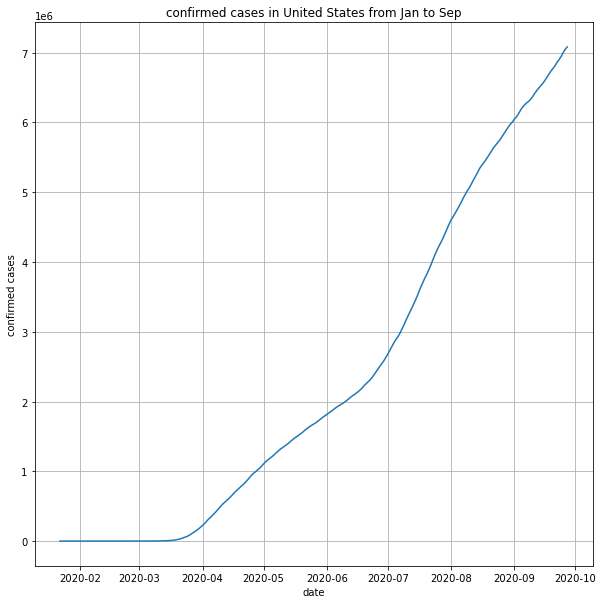

In [785]:
#result and visualization for guiding quesiton 1
fig = plt.figure(0, figsize=(10,10))

plt.plot(us_2020['date'],us_2020['positive'])
plt.xlabel('date')
plt.ylabel('confirmed cases')
plt.title('confirmed cases in United States from Jan to Sep')
plt.grid()

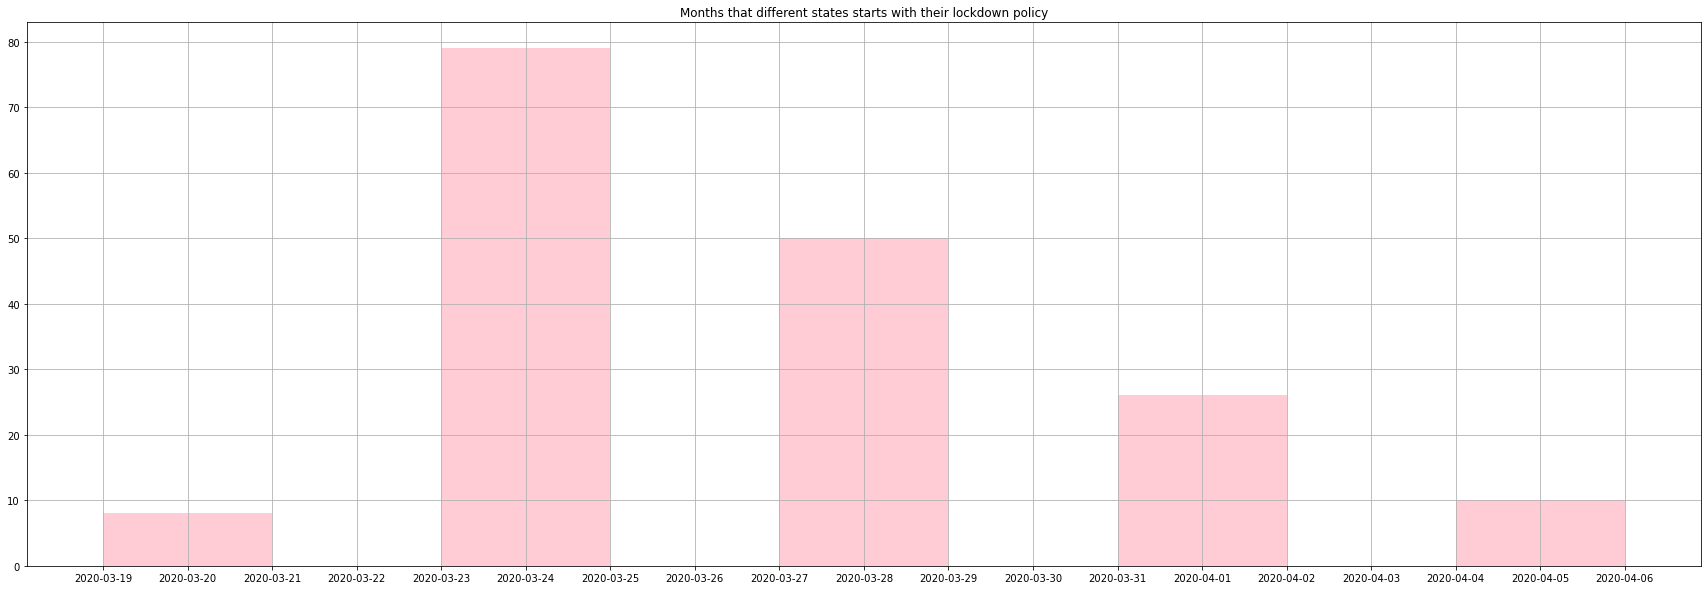

In [788]:
#result and visualization for guiding quesiton 1

fig = plt.figure(0, figsize=(30,10))

date_freq=lockdown['Date']
plt.hist(date_freq,bins=5, alpha=0.8,rwidth=0.5, color='pink')
plt.title("Months that different states starts with their lockdown policy")
plt.grid()

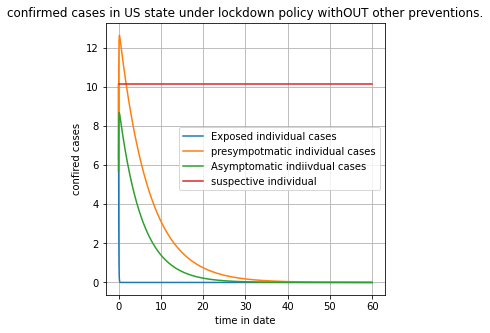

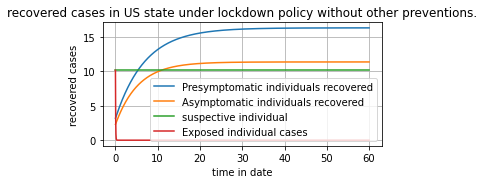

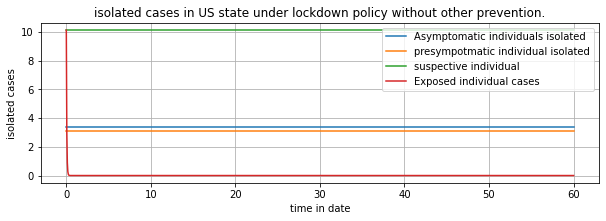

In [624]:
#Guiding question_3 result:

# using matplotlib to plot the result 
# Since I have a lot of compartments, I separate different suitation based on 3 categories: confirmed cases, recovered 
#cases, as well as isolated cases for a better visual experience.
plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
# plot results
plt.plot(t, E, label='Exposed individual cases ')
plt.plot(t, I_p, label='presympotmatic individual cases')
plt.plot(t, I_a, label='Asymptomatic indiivdual cases ')
plt.plot(t, S, label='suspective individual')
plt.xlabel('time in date')
plt.ylabel('confired cases')
plt.title('confirmed cases in US state under lockdown policy withOUT other preventions.')
plt.legend(loc=0)
plt.grid()

plt.figure(figsize=(5,5))
plt.subplot(2,1,1)
plt.plot(t, U_p, label='Presymptomatic individuals recovered')
plt.plot(t, U_a, label='Asymptomatic individuals recovered')
plt.plot(t, S, label='suspective individual')
plt.plot(t, E, label='Exposed individual cases ')
plt.xlabel('time in date')
plt.ylabel('recovered cases')
plt.title('recovered cases in US state under lockdown policy without other preventions.')
plt.legend(loc=0)
plt.grid()

plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.plot(t, D_a, label='Asymptomatic individuals isolated ')
plt.plot(t, D_p, label='presympotmatic individual isolated')
plt.plot(t, S, label='suspective individual')
plt.plot(t, E, label='Exposed individual cases ')
plt.xlabel('time in date')
plt.ylabel('isolated cases')
plt.title('isolated cases in US state under lockdown policy without other prevention.')
plt.legend(loc=0)
plt.grid()

In [626]:
scenario2_confirmed = Image.open("confirmed3.jpeg")
scenario2_recovered = Image.open("recovered3.jpeg")
scenario2_isolated = Image.open("isolated3.jpeg")


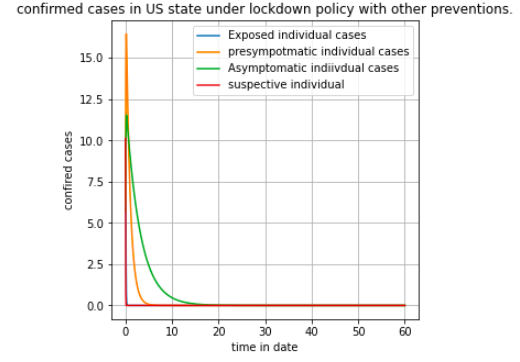

In [627]:
scenario2_confirmed

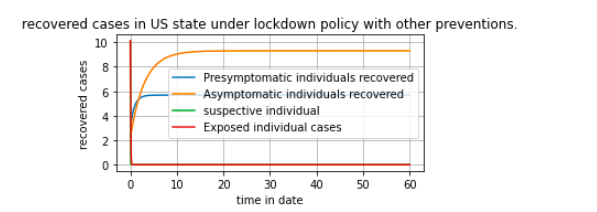

In [628]:
scenario2_recovered

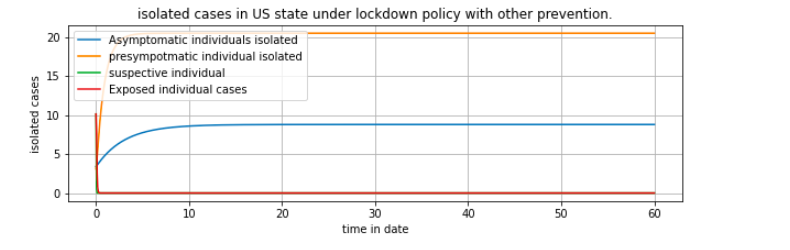

In [629]:
scenario2_isolated

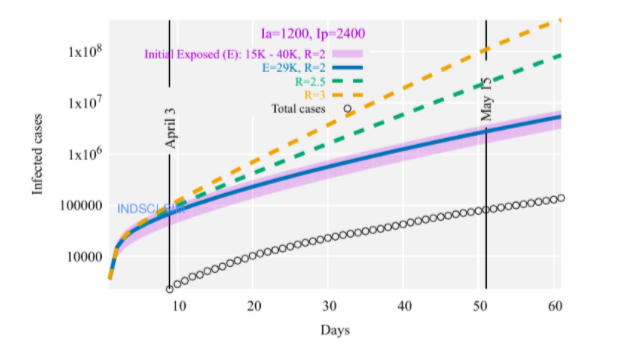

In [588]:
picture = Image.open("lockdown.jpeg")
picture


## Discussion and Conclusion

_(What did you learn from your results? What obstacles did you run into? What would you do differently next time? Clearly provide quantitative answers to your question(s)?  At least one of your questions should be answered with numbers.  That is, it is not sufficient to answer "yes" or "no", but rather to say something quantitative such as variable 1 increased roughly 10% for every 1 year increase in variable 2.)_

In this project, I am confident that I answered all the three questions I had:
Question 1: what is the overall pattern of covid cases in the US throughout the year? 

the cases increase throughout the year however a slight decrease in the rate of growth is detected from March to the beginning of July. During that time March to Spring, I observe 45 states started lockdown policy in different forms. also able to observe the slope of the covid case from April to July is 0.026 which is smaller than the slope of the covid case in millions from April to July: 0.049, indicating a slowed down rate from April to July.

Question 2: How is population density related to the lockdown policy? 

the population of a denser area, there will be a relatively stricter lockdown policy that may include a prohibition on large gathering, closed business and local enterprises as well as dine-in restriction, in this session, the three highest density state have relatively stricter lockdown policy besides the use of social distancing. The lockdown policy therefore is used as a mean to controlling population density and are strongly addressed at the area where they are higher density.

Question 3: How does the lockdown policy affect the rate of infection among individuals? 

As I observe the three scenarios, I can conclude that the r lockdown factor has a certain effect on helping the decline of covid cases. However, the change of behavior in the 3 graphs aren't visible when the r changes from 0.1 to 3. Solely from this result, I conclude the pure lockdown policy isn't effective. With the combination of policies such as quarantining and social distancing, the rate of decline is about 50% as the time needed for confirmed cases to decreases is 1/2 compared to the original time (20days)needed. presymptomatic isolation is effective under a combination of prevention within the first 10 days. therefore, I can conclude that lockdown with the presence of other measurements and prevention are effective in slowing down the rate of covid.

This is an expected result since the lockdown policy especially the stay home order is rather suggestive than mandatory. the state can control the entrance of local business however it is very hard to track individual mobility and to reinforce social gathering regulations. people still have the freedom to move around therefore makes the lockdown policy very hard to take effect. With social distancing and quarantine regulation implemented, people are more aware of their health condition, people will take the covid test and isolate themself from others, or be more mindful towards their distance with others make the lockdown policy more effective.

The three questions are closely related, as each one leads to the next one. By understanding the first question, I understand the need to research the impact of the lockdown policy and move on to find out what this policy entails and which states are most affected by this policy, and finally find out what the policy does by seeing quantitive results.
During the project, I have also met some obstacles: Firstly, when I load the second CSV file since all the values are nominal(categorical) values, therefore it is really hard to clean the data using mask since the values are non-numerical, it is meaningless to look for their mean, average and mode value, I can only assume the correlation than to present on using linear regression.

Secondly, It is really hard to understand the result of the ODE model considering there are so many parameters in this model, the simple version of SEIR contains less compartment and parameters therefore it is easier to interpret the result. Additionally, since there are not detailed data recorded to compute for compartment such as asymptomatic patients, the numbers initial condition are not reliable therefore can result in a discrepancy in the final result. Since the original SEIR model doesn't monitor isolated individuals or quarantined, it is very difficult for me to compute the data for initial conditions. Therefore in the future, I might need to either find a more reliable model with an inclusive dataset or I need to dig deeper into the research.

Thirdly, since the dataset is centering around pandemic, a lot of files are very big and hard to load for a notebook, for example when I compute data for my model, some data are above millions and it might be something I need to consider in the future. Either to choose a simpler model or less-data based topics.
I believe next time I would probably spend more time researching compartmental models and how each state can fit into the model instead of just simply introducing it.

### References

_(List the source(s) for any data and/or literature cited in your project.  Ideally, this should be formatted using a formal citation format (MLA or APA or other, your choice!).   Multiple free online citation generators are available such as <a href="http://www.easybib.com/style">http://www.easybib.com/style</a>. **Important:** if you use **any** code that you find on the internet for your project you **must** cite it or you risk losing most/all of the points for you project.)_


Lockdown measures helped reduce the number of COVID-19 cases around the world, study finds. (2020). Retrieved 6 December 2020, from 
    https://medicalxpress.com/news/2020-07-lockdown-covid-cases-world.html

Bureau, U. (2020). State Population Totals: 2010-2019. Retrieved 6 December 2020, from
    https://www.census.gov/data/datasets/time-series/demo/popest/2010s-state-total.html
    
US counties COVID 19 dataset. (2020). Retrieved 6 December 2020, from 
    https://www.kaggle.com/fireballbyedimyrnmom/us-counties-covid-19-dataset

COVID-19 Dataset. (2020). Retrieved 6 December 2020, from
    https://www.kaggle.com/imdevskp/corona-virus-report?select=covid_19_clean_complete.csv
    
dhar, a. (2020). Covid-19: analysis of a modified SEIR model, a comparison of different intervention strategies and projections for India. Retrieved 7 December 2020, from 
    https://arxiv.org/pdf/2005.11511.pdf
    
A state-level epidemiological model for India: INDSCI-SIM -. (2020). Retrieved 7 December 2020, from
    https://indscicov.in/for-scientists-healthcare-professionals/mathematical-modelling/indscisim/
    
 Americans' responses to COVID-19 stay-home orders differed according to population density: Lockdowns did not stop people from visiting parks and beaches; electoral results also linked to compliance. (2020). Retrieved 7 December 2020, from
    https://www.sciencedaily.com/releases/2020/10/201021130136.htm